Praktikum Week 6
Ricky Jonathan H. T - 0706022210005


In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [27]:
# Step 2: Load dataset dari URL
url = "https://raw.githubusercontent.com/rickyjooooooe/DATASET/refs/heads/main/breast-cancer.csv"
data = pd.read_csv(url)  # Membaca file CSV dan memuatnya sebagai DataFrame
print("Data Sample:")
data.sample(n=10)

Data Sample:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
457,9112367,B,13.21,25.25,84.10,537.9,0.08791,0.05205,0.027720,0.020680,...,14.35,34.23,91.29,632.9,0.12890,0.10630,0.13900,0.06005,0.2444,0.06788
484,912600,B,15.73,11.28,102.80,747.2,0.10430,0.12990,0.119100,0.062110,...,17.01,14.20,112.50,854.3,0.15410,0.29790,0.40040,0.14520,0.2557,0.08181
241,883539,B,12.42,15.04,78.61,476.5,0.07926,0.03393,0.010530,0.011080,...,13.20,20.37,83.85,543.4,0.10370,0.07776,0.06243,0.04052,0.2901,0.06783
384,902727,B,13.28,13.72,85.79,541.8,0.08363,0.08575,0.050770,0.028640,...,14.24,17.37,96.59,623.7,0.11660,0.26850,0.28660,0.09173,0.2736,0.07320
149,869931,B,13.74,17.91,88.12,585.0,0.07944,0.06376,0.028810,0.013290,...,15.34,22.46,97.19,725.9,0.09711,0.18240,0.15640,0.06019,0.2350,0.07014
516,916799,M,18.31,20.58,120.80,1052.0,0.10680,0.12480,0.156900,0.094510,...,21.86,26.20,142.20,1493.0,0.14920,0.25360,0.37590,0.15100,0.3074,0.07863
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.051920,0.027910,...,16.46,25.44,106.00,831.0,0.11420,0.20700,0.24370,0.07828,0.2455,0.06596
399,904357,B,11.80,17.26,75.26,431.9,0.09087,0.06232,0.028530,0.016380,...,13.45,24.49,86.00,562.0,0.12440,0.17260,0.14490,0.05356,0.2779,0.08121
373,901288,M,20.64,17.35,134.80,1335.0,0.09446,0.10760,0.152700,0.089410,...,25.37,23.17,166.80,1946.0,0.15620,0.30550,0.41590,0.21120,0.2689,0.07055
306,89344,B,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,...,14.41,20.45,92.00,636.9,0.11280,0.13460,0.01120,0.02500,0.2651,0.08385


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [29]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [30]:
# Menampilkan jumlah nilai unik
print(data['diagnosis'].value_counts(dropna=False))



diagnosis
B    357
M    212
Name: count, dtype: int64


In [34]:
data.isnull().sum()





,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


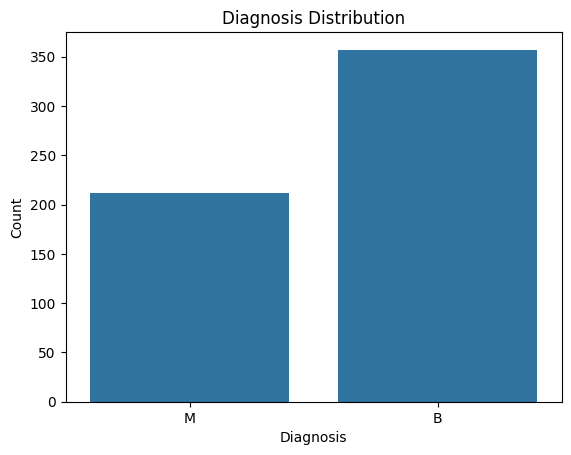

In [33]:
sns.countplot(data, x='diagnosis')
plt.title('Diagnosis Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

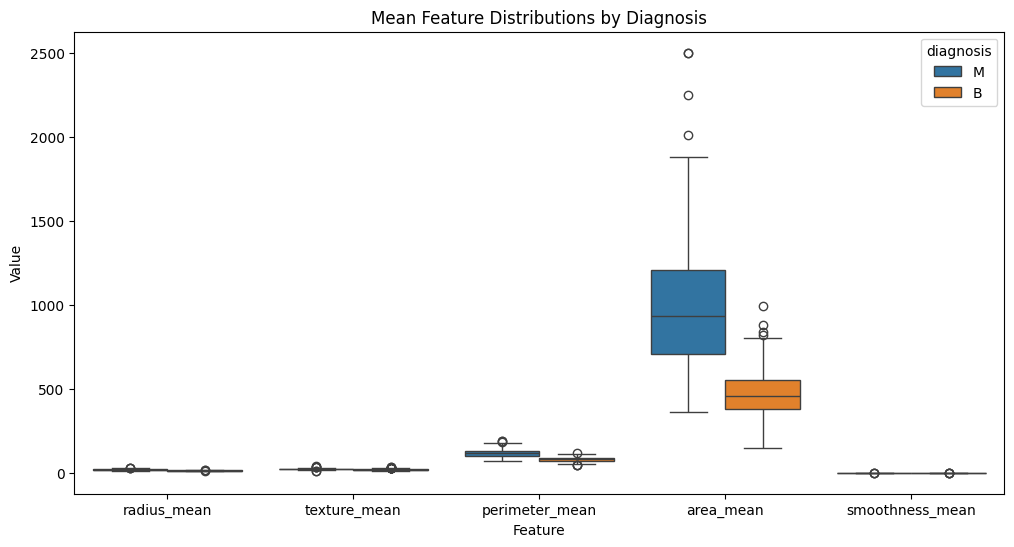

In [36]:
features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
data_melted = data.melt(id_vars='diagnosis', value_vars=features)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data_melted, x='variable', y='value', hue='diagnosis')
plt.title('Mean Feature Distributions by Diagnosis')
plt.xlabel('Feature')
plt.ylabel('Value')
plt.show()


In [41]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

data.sample(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
266,8910251,0,10.600,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.25150,0.19160,0.07926,0.2940,0.07587
76,8610629,0,13.530,10.94,87.91,559.2,0.12910,0.10470,0.06877,0.06556,...,14.08,12.49,91.36,605.5,0.1451,0.13790,0.08539,0.07407,0.2710,0.07191
241,883539,0,12.420,15.04,78.61,476.5,0.07926,0.03393,0.01053,0.01108,...,13.20,20.37,83.85,543.4,0.1037,0.07776,0.06243,0.04052,0.2901,0.06783
289,89143601,0,11.370,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.02173,...,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994
94,862028,1,15.060,19.83,100.30,705.6,0.10390,0.15530,0.17000,0.08815,...,18.23,24.23,123.50,1025.0,0.1551,0.42030,0.52030,0.21150,0.2834,0.08234
88,861597,0,12.360,21.80,79.78,466.1,0.08772,0.09445,0.06015,0.03745,...,13.83,30.50,91.46,574.7,0.1304,0.24630,0.24340,0.12050,0.2972,0.09261
150,871001501,0,13.000,20.78,83.51,519.4,0.11350,0.07589,0.03136,0.02645,...,14.16,24.11,90.82,616.7,0.1297,0.11050,0.08112,0.06296,0.3196,0.06435
32,85382601,1,17.020,23.98,112.80,899.3,0.11970,0.14960,0.24170,0.12030,...,20.88,32.09,136.10,1344.0,0.1634,0.35590,0.55880,0.18470,0.3530,0.08482
68,859471,0,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,...,10.31,22.65,65.50,324.7,0.1482,0.43650,1.25200,0.17500,0.4228,0.11750
256,88649001,1,19.550,28.77,133.60,1207.0,0.09260,0.20630,0.17840,0.11440,...,25.05,36.27,178.60,1926.0,0.1281,0.53290,0.42510,0.19410,0.2818,0.10050


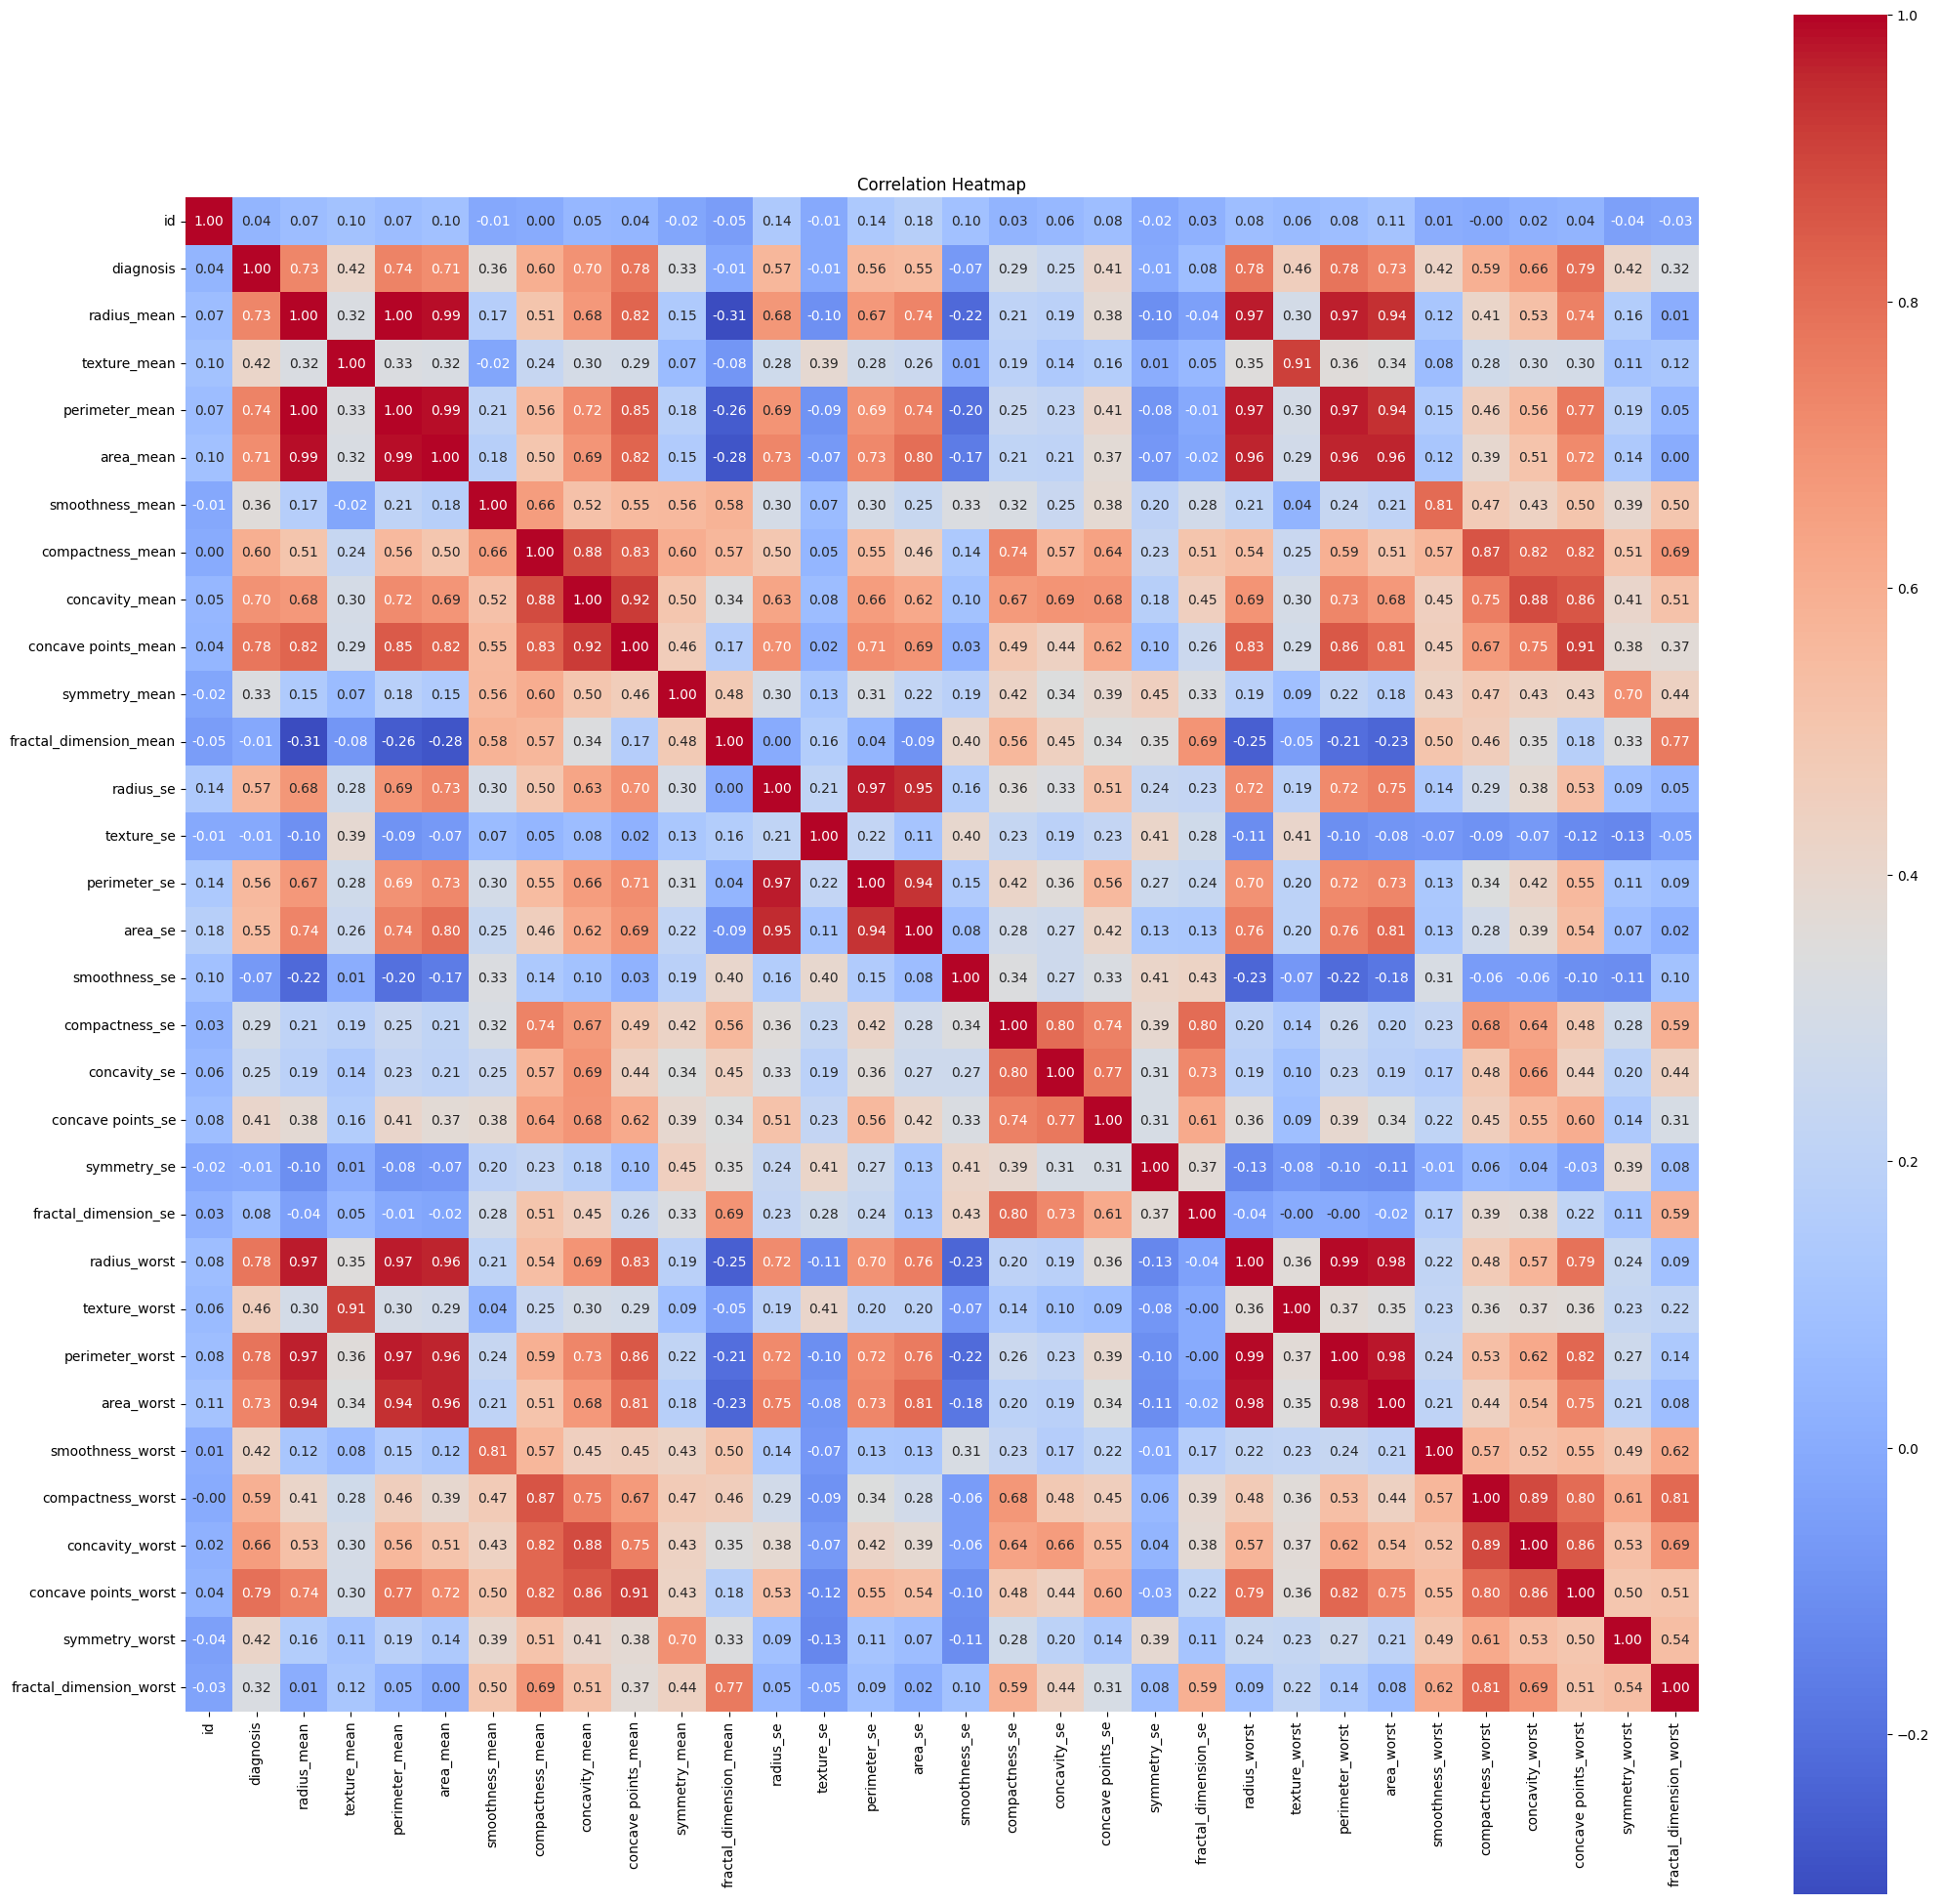

In [62]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 25))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)
plt.title('Correlation Heatmap')
plt.show()

Decision Tree


Training set shape: (455, 30), Testing set shape: (114, 30)
Accuracy with Entropy criterion: 0.9561
Training accuracy (Entropy): 0.9802


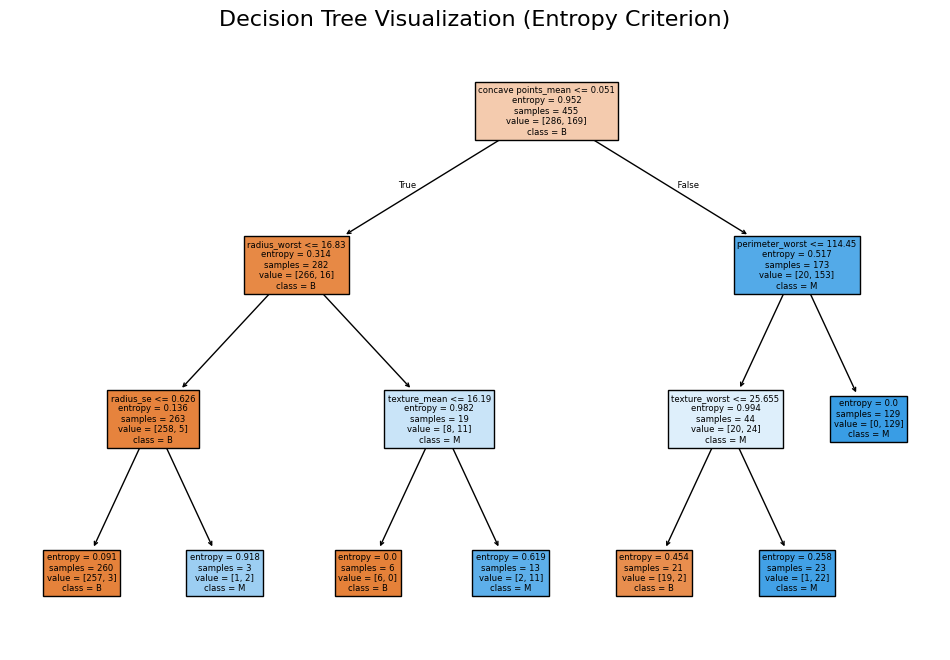

Cross-validated accuracy (Entropy): 0.9333
Feature Importance (Entropy):
                          Importance
concave points_mean        0.665589
perimeter_worst            0.119098
radius_worst               0.089418
texture_worst              0.073792
texture_mean               0.027677
radius_se                  0.024426
radius_mean                0.000000
concave points_se          0.000000
symmetry_worst             0.000000
concave points_worst       0.000000
concavity_worst            0.000000
compactness_worst          0.000000
smoothness_worst           0.000000
area_worst                 0.000000
fractal_dimension_se       0.000000
symmetry_se                0.000000
compactness_se             0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
concavity_mean            

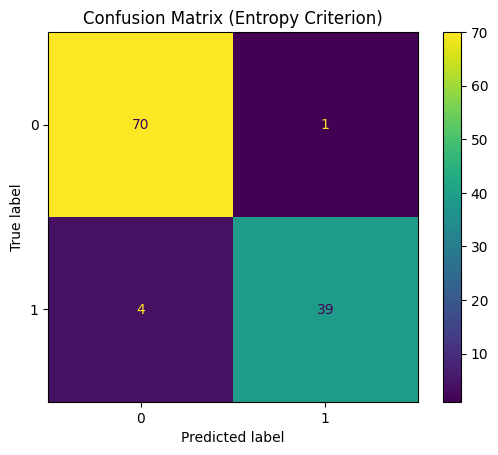

Classification Report (Entropy):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [54]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

# Load your DataFrame
# Assuming your DataFrame is named 'data'
X = data.drop(['diagnosis', 'id'], axis=1)  # Features
y = data['diagnosis']  # Target variable

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing datasets
print(f'Training set shape: {X_train.shape}, Testing set shape: {X_test.shape}')

# 1. Decision Tree Classification using Entropy
# Create and fit the model
entropy_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
entropy_model.fit(X_train, y_train)

# Make predictions on the test set
predictions_entropy = entropy_model.predict(X_test)

# Calculate accuracy for both training and test sets
train_accuracy_entropy = accuracy_score(y_train, entropy_model.predict(X_train))
test_accuracy_entropy = accuracy_score(y_test, predictions_entropy)

print(f'Accuracy with Entropy criterion: {test_accuracy_entropy:.4f}')
print(f'Training accuracy (Entropy): {train_accuracy_entropy:.4f}')

# Visualizing the decision tree for the entropy model
plt.figure(figsize=(12, 8))
tree.plot_tree(entropy_model, feature_names=X.columns, class_names=["B", "M"], filled=True)
plt.title('Decision Tree Visualization (Entropy Criterion)', fontsize=16)
plt.show()

# Cross-validation score for the entropy model
cv_scores_entropy = cross_val_score(entropy_model, X, y, cv=5)
print(f'Cross-validated accuracy (Entropy): {cv_scores_entropy.mean():.4f}')

# Feature importance
importance_entropy = entropy_model.feature_importances_
importance_df_entropy = pd.DataFrame(importance_entropy, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importance (Entropy):\n", importance_df_entropy)

# Confusion matrix and classification report for the entropy model
confusion_mat_entropy = confusion_matrix(y_test, predictions_entropy)
disp_entropy = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_entropy, display_labels=entropy_model.classes_)
disp_entropy.plot()
plt.title('Confusion Matrix (Entropy Criterion)')
plt.show()
print("Classification Report (Entropy):\n", classification_report(y_test, predictions_entropy))



Accuracy with Gini criterion: 0.9386
Training accuracy (Gini): 0.9780


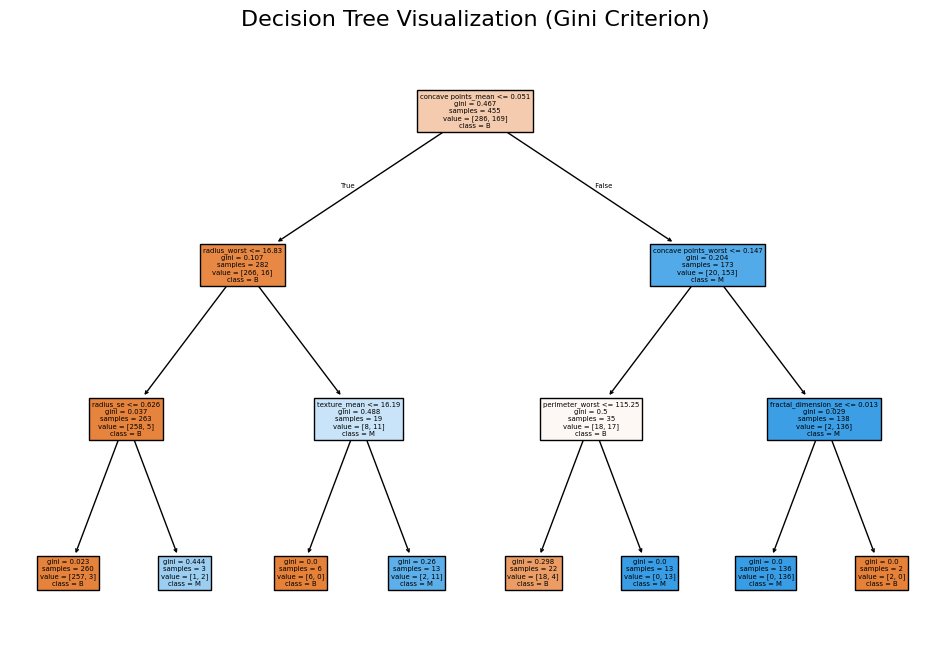

Cross-validated accuracy (Gini): 0.9174
Feature Importance (Gini):
                          Importance
concave points_mean        0.752304
concave points_worst       0.071432
radius_worst               0.056905
perimeter_worst            0.056028
texture_mean               0.030106
fractal_dimension_se       0.020188
radius_se                  0.013038
radius_mean                0.000000
concave points_se          0.000000
symmetry_worst             0.000000
concavity_worst            0.000000
compactness_worst          0.000000
smoothness_worst           0.000000
area_worst                 0.000000
texture_worst              0.000000
symmetry_se                0.000000
compactness_se             0.000000
concavity_se               0.000000
smoothness_se              0.000000
area_se                    0.000000
perimeter_se               0.000000
texture_se                 0.000000
fractal_dimension_mean     0.000000
symmetry_mean              0.000000
concavity_mean             0.000

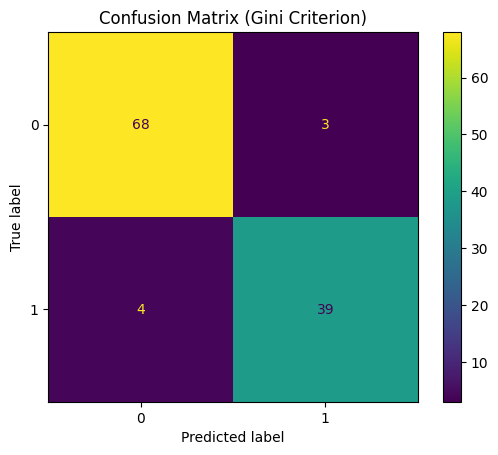

Classification Report (Gini):
               precision    recall  f1-score   support

           0       0.94      0.96      0.95        71
           1       0.93      0.91      0.92        43

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [55]:
# 2. Decision Tree Classification using Gini
# Create and fit the Gini model
gini_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
gini_model.fit(X_train, y_train)

# Make predictions on the test set using the Gini model
predictions_gini = gini_model.predict(X_test)

# Calculate accuracy for both training and test sets
train_accuracy_gini = accuracy_score(y_train, gini_model.predict(X_train))
test_accuracy_gini = accuracy_score(y_test, predictions_gini)

print(f'Accuracy with Gini criterion: {test_accuracy_gini:.4f}')
print(f'Training accuracy (Gini): {train_accuracy_gini:.4f}')

# Visualizing the decision tree for the Gini model
plt.figure(figsize=(12, 8))
tree.plot_tree(gini_model, feature_names=X.columns, class_names=['B', 'M'], filled=True)
plt.title('Decision Tree Visualization (Gini Criterion)', fontsize=16)
plt.show()

# Cross-validation score for the Gini model
cv_scores_gini = cross_val_score(gini_model, X, y, cv=5)
print(f'Cross-validated accuracy (Gini): {cv_scores_gini.mean():.4f}')

# Feature importance
importance_gini = gini_model.feature_importances_
importance_df_gini = pd.DataFrame(importance_gini, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("Feature Importance (Gini):\n", importance_df_gini)

# Confusion matrix and classification report for the Gini model
confusion_mat_gini = confusion_matrix(y_test, predictions_gini)
disp_gini = ConfusionMatrixDisplay(confusion_matrix=confusion_mat_gini, display_labels=gini_model.classes_)
disp_gini.plot()
plt.title('Confusion Matrix (Gini Criterion)')
plt.show()
print("Classification Report (Gini):\n", classification_report(y_test, predictions_gini))


Naive Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB

# Naive Bayes Model
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)


GaussianNB()

In [57]:
# Predicting with Naive Bayes
y_pred_nb = nb_model.predict(X_test)


In [58]:
# Accuracy for Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Naive Bayes Accuracy: {accuracy_nb}")


Naive Bayes Accuracy: 0.9736842105263158


In [59]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)
print(f"Confusion Matrix (Naive Bayes):\n{cm_nb}")


Confusion Matrix (Naive Bayes):
[[71  0]
 [ 3 40]]


In [60]:
# Classification Report for Naive Bayes
print("Classification Report (Naive Bayes):\n", classification_report(y_test, y_pred_nb))


Classification Report (Naive Bayes):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



SVM (Support Vector Machine)

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Inisialisasi model SVM
svm_model = SVC(kernel='linear', random_state=42)

# Melatih model SVM
svm_model.fit(X_train, y_train)

# Prediksi menggunakan model SVM
y_pred_svm = svm_model.predict(X_test)

# Menghitung akurasi model SVM
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm}")

# Menampilkan confusion matrix untuk SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(f"Confusion Matrix (SVM):\n{cm_svm}")

# Menampilkan classification report untuk SVM
print("Classification Report (SVM):\n", classification_report(y_test, y_pred_svm))


SVM Accuracy: 0.956140350877193
Confusion Matrix (SVM):
[[70  1]
 [ 4 39]]
Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

